In [6]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os

In [7]:
# create a path
path = r'C:\Users\Spero\Documents\Customer shopping trends analysis'

In [8]:
data = pd.read_csv(os.path.join(path, '02 Data', 'original data', 'shopping_trends.csv'), index_col = False)
data.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Payment Method,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Preferred Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Credit Card,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Bank Transfer,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Cash,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,PayPal,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Cash,Free Shipping,Yes,Yes,31,PayPal,Annually


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 19 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer ID               3900 non-null   int64  
 1   Age                       3900 non-null   int64  
 2   Gender                    3900 non-null   object 
 3   Item Purchased            3900 non-null   object 
 4   Category                  3900 non-null   object 
 5   Purchase Amount (USD)     3900 non-null   int64  
 6   Location                  3900 non-null   object 
 7   Size                      3900 non-null   object 
 8   Color                     3900 non-null   object 
 9   Season                    3900 non-null   object 
 10  Review Rating             3900 non-null   float64
 11  Subscription Status       3900 non-null   object 
 12  Payment Method            3900 non-null   object 
 13  Shipping Type             3900 non-null   object 
 14  Discount

# Dataset Glossary (Column-wise)

## Customer ID - Unique identifier for each customer

## Age - Age of the customer

## Gender - Gender of the customer (Male/Female)

## Item Purchased - The item purchased by the customer

## Category - Category of the item purchased

## Purchase Amount (USD) - The amount of the purchase in USD

## Location - Location where the purchase was made

## Size - Size of the purchased item

## Color - Color of the purchased item

## Season - Season during which the purchase was made

## Review Rating - Rating given by the customer for the purchased item

## Subscription Status - Indicates if the customer has a subscription (Yes/No)

## Shipping Type - Type of shipping chosen by the customer

## Discount Applied - Indicates if a discount was applied to the purchase (Yes/No)

## Promo Code Used - Indicates if a promo code was used for the purchase (Yes/No)

## Previous Purchases - The total count of transactions concluded by the customer at the store, excluding the ongoing transaction

## Payment Method - Customer's most preferred payment method

## Frequency of Purchases - Frequency at which the customer makes purchases (e.g., Weekly, Fortnightly, Monthly)

In [10]:
mean_by_location = data.groupby('Location')['Purchase Amount (USD)'].mean()

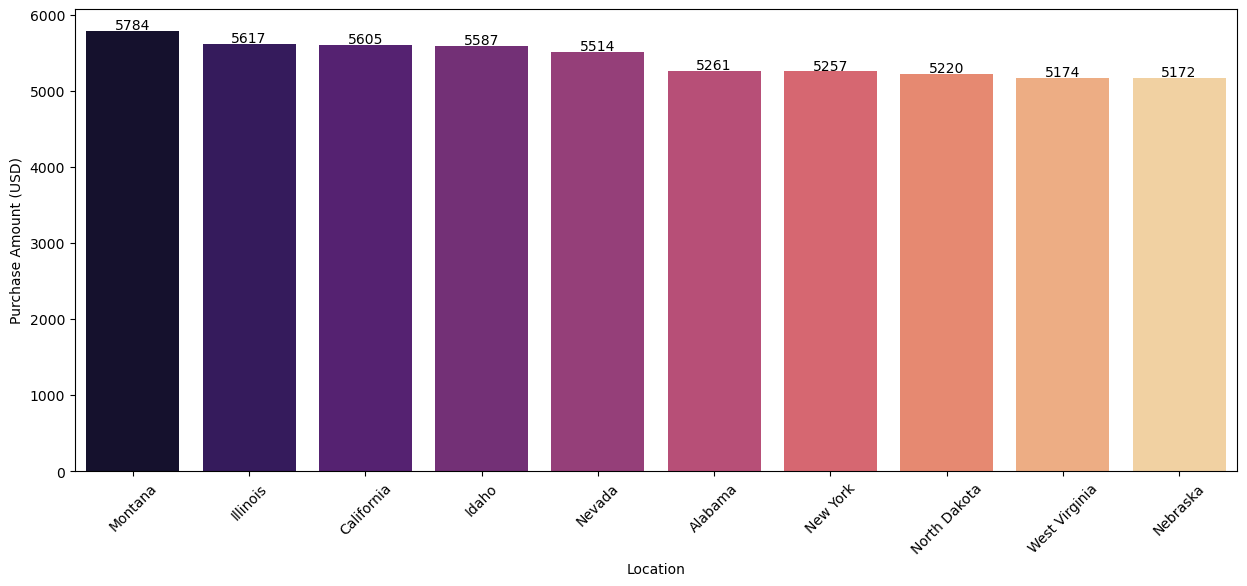

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

plt.figure(figsize = (15,6))
ax = sns.barplot(data = data.groupby(['Location'])['Purchase Amount (USD)'].sum().reset_index().sort_values('Purchase Amount (USD)', ascending = False).head(10),x = 'Location', y = 'Purchase Amount (USD)' , palette = 'magma')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

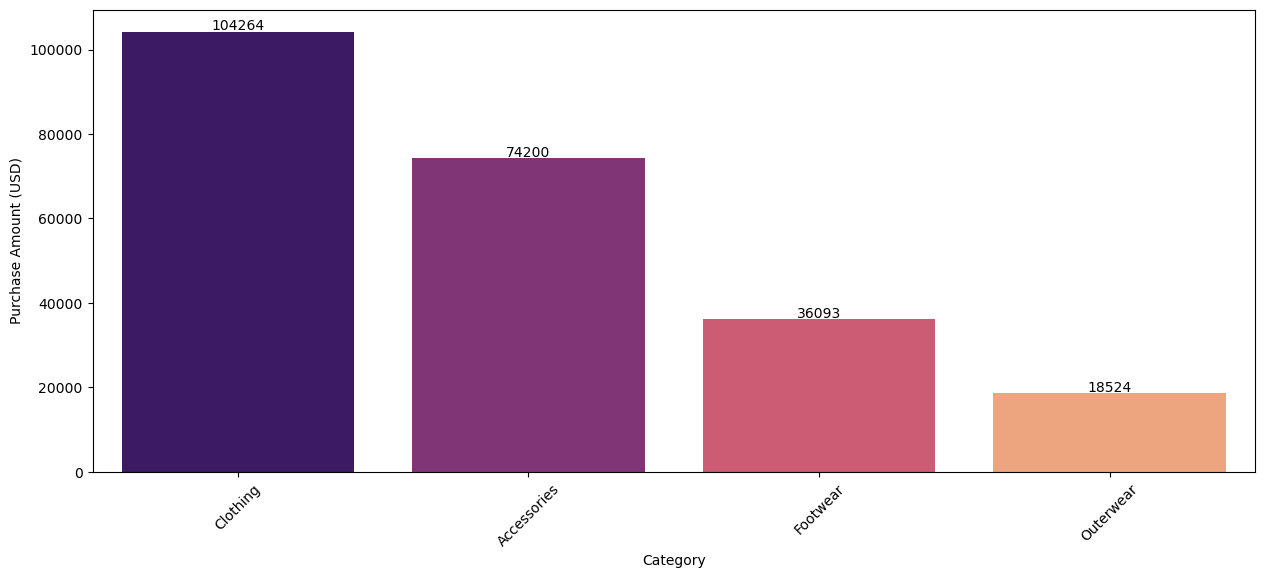

In [12]:
plt.figure(figsize = (15,6))
ax = sns.barplot(data = data.groupby(['Category'])['Purchase Amount (USD)'].sum().reset_index().sort_values('Purchase Amount (USD)', ascending = False).head(10),x = 'Category', y = 'Purchase Amount (USD)' , palette = 'magma')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

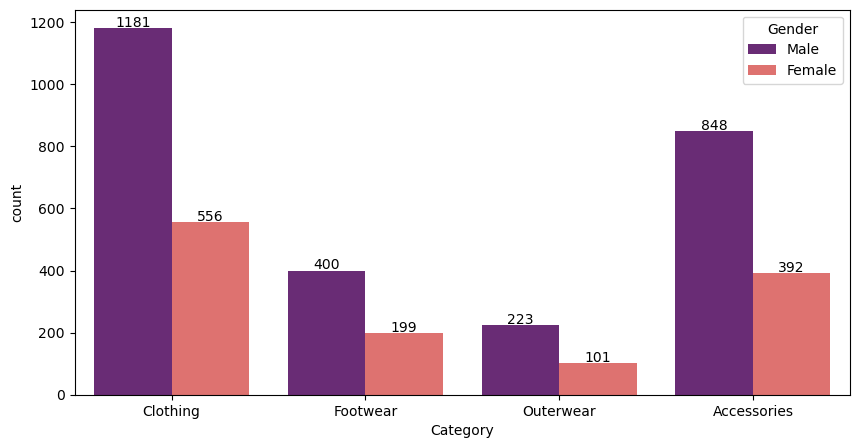

In [13]:
plt.figure(figsize  = (10, 5))
ax = sns.countplot(data = data, x = 'Category',hue = "Gender", palette = 'magma')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

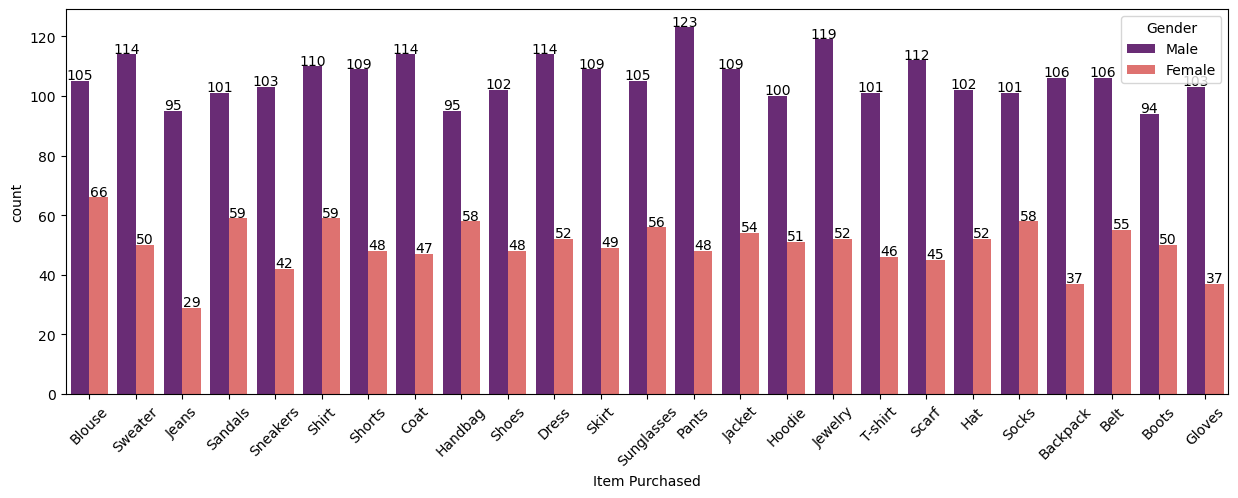

In [14]:
plt.figure(figsize  = (15, 5))
ax = sns.countplot(data = data, x = 'Item Purchased',hue = "Gender", palette = 'magma')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

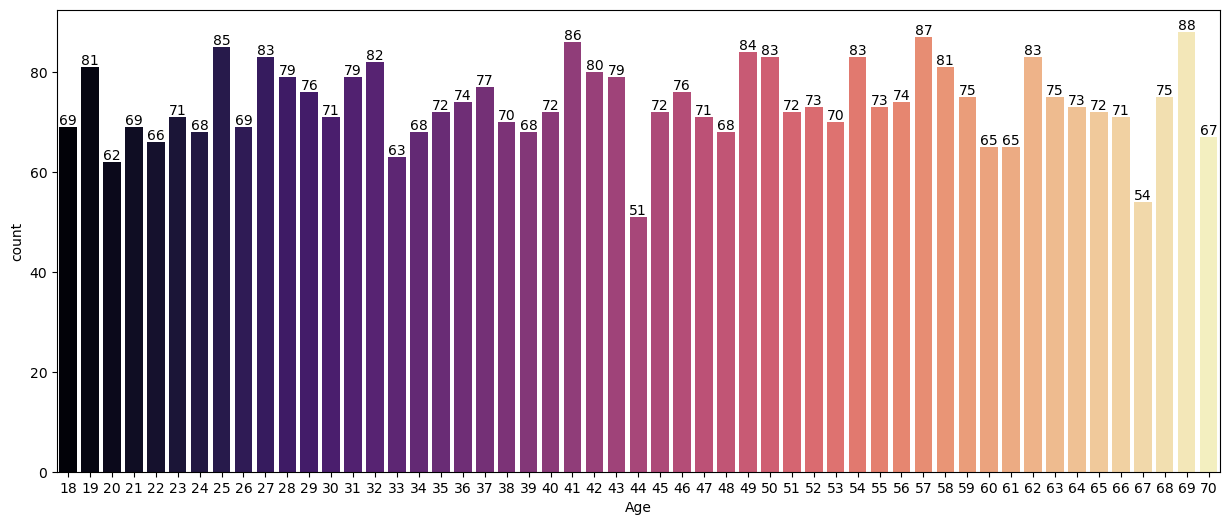

In [15]:
plt.subplots(figsize=(15, 6))
ax = sns.countplot(data = data,x = 'Age', palette = 'magma')
plt.xticks(rotation=0)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

In [16]:
data.groupby('Shipping Type')['Purchase Amount (USD)'].mean()

Shipping Type
2-Day Shipping    60.733652
Express           60.475232
Free Shipping     60.410370
Next Day Air      58.631173
Standard          58.460245
Store Pickup      59.893846
Name: Purchase Amount (USD), dtype: float64

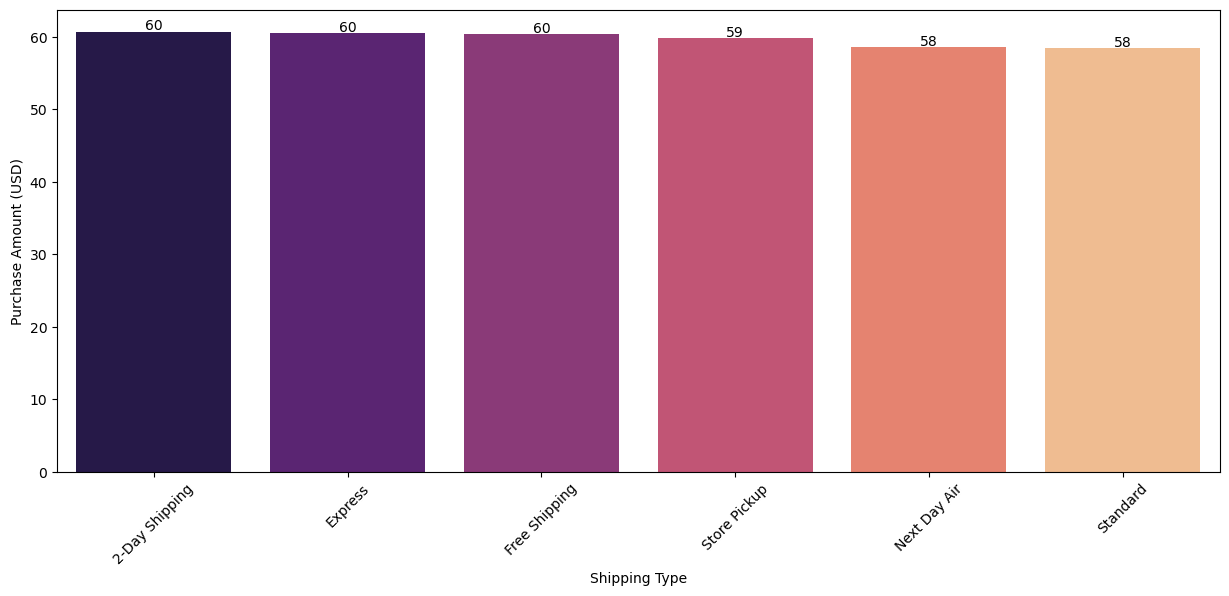

In [17]:
plt.figure(figsize = (15,6))
ax = sns.barplot(data = data.groupby('Shipping Type')['Purchase Amount (USD)'].mean().reset_index().sort_values('Purchase Amount (USD)', ascending = False).head(10),x = 'Shipping Type', y = 'Purchase Amount (USD)' , palette = 'magma')
plt.xticks(rotation=45)

for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

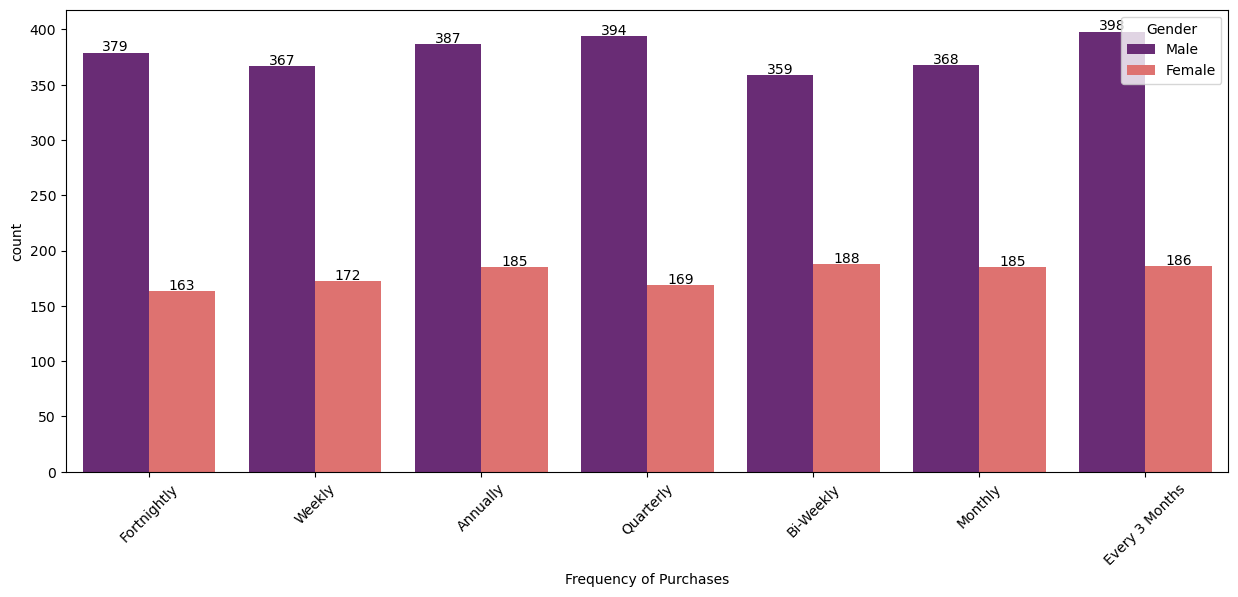

In [18]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data = data, x = 'Frequency of Purchases',hue = "Gender",palette = 'magma')
plt.xticks(rotation=45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

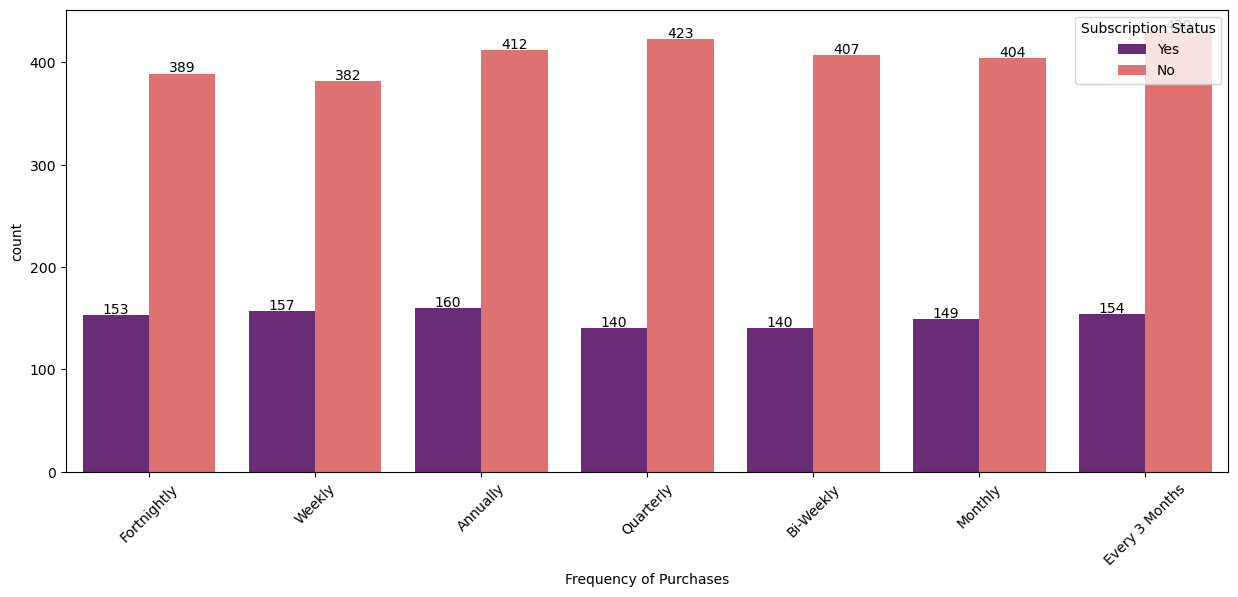

In [19]:
plt.figure(figsize = (15,6))
ax = sns.countplot(data = data, x = 'Frequency of Purchases',hue = 'Subscription Status', palette = 'magma')
plt.xticks(rotation = 45)


for p in ax.patches:
    ax.annotate(f'{int(p.get_height())}', (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center',
                xytext=(0, 4), textcoords = 'offset points')

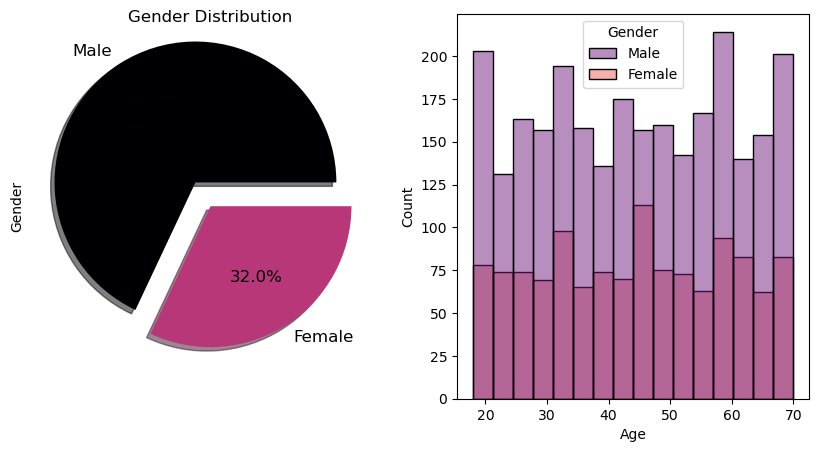

In [20]:
from matplotlib.cm import get_cmap
gender_count = data['Gender'].value_counts()
cmap = get_cmap('magma')
colors = [cmap(i / len(gender_count)) for i in range(len(gender_count))]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (10, 5))
gender_count.plot(kind = 'pie', fontsize = 12, explode = (0.2, 0), shadow = True, autopct = '%1.1f%%', ax = ax1, colors = colors)
ax1.set_title('Gender Distribution')
sns.histplot(data = data, x = 'Age', hue = 'Gender', ax = ax2, palette = 'magma')

plt.show()

# Data Insights¶
## Purchase Location Independence: Purchase amounts do not exhibit a significant dependency on locations.

## Popular Categories: Clothes and accessories emerge as the most favored product categories among customers.

## Gender Disparity: Men tend to make more purchases than women.

## Age-Neutral Shopping: The data shows that individuals of all age groups exhibit a propensity for shopping,

## Shipping Irrelevance: The type of shipping method employed by customers does not significantly affect their purchase behavior.

## Purchase Frequency: Customers engage in shopping with varying frequencies.

## Gender Ratio: The data reflects a gender ratio of approximately 68% male customers and 32% female customers.